In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
train=pd.read_csv("train_hr.csv")
test=pd.read_csv("test_hr.csv")

In [3]:
train.shape,test.shape

((54808, 14), (23490, 13))

In [4]:
#concate train and test data 
hr=pd.concat([train,test])

In [5]:
#check shape of data
hr.shape

(78298, 14)

In [6]:
hr.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0.0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0.0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0.0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0.0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0.0


# Exploratry Data Analysis

In [7]:
#check null values
hr.isnull().sum()

employee_id                 0
department                  0
region                      0
education                3443
gender                      0
recruitment_channel         0
no_of_trainings             0
age                         0
previous_year_rating     5936
length_of_service           0
KPIs_met >80%               0
awards_won?                 0
avg_training_score          0
is_promoted             23490
dtype: int64

In [8]:
#check data types by (dtypes)
hr.dtypes

employee_id               int64
department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
is_promoted             float64
dtype: object

In [9]:
hr.select_dtypes(include=object).head()

,department,region,education,gender,recruitment_channel
0,Sales & Marketing,region_7,Master's & above,f,sourcing
1,Operations,region_22,Bachelor's,m,other
2,Sales & Marketing,region_19,Bachelor's,m,sourcing
3,Sales & Marketing,region_23,Bachelor's,m,other
4,Technology,region_26,Bachelor's,m,other


In [10]:
hr.select_dtypes(include=int).head()

,employee_id,no_of_trainings,age,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,65438,1,35,8,1,0,49
1,65141,1,30,4,0,0,60
2,7513,1,34,7,0,0,50
3,2542,2,39,10,0,0,50
4,48945,1,45,2,0,0,73


In [11]:
#check unique category in each variable
for i in hr.columns:
    print(i,len(hr[i].value_counts()))

employee_id 78298
department 9
region 34
education 3
gender 2
recruitment_channel 3
no_of_trainings 10
age 41
previous_year_rating 5
length_of_service 35
KPIs_met >80% 2
awards_won? 2
avg_training_score 61
is_promoted 2


In [12]:
#change datatypes of no_of_trainings
hr['no_of_trainings']=hr['no_of_trainings'].astype(object)

In [13]:
#change datatypes of previous_year_rating
hr['previous_year_rating']=hr['previous_year_rating'].astype(object)

In [14]:
#change datatypes of KPIs_met >80%
hr['KPIs_met >80%']=hr['KPIs_met >80%'].astype(object)

In [15]:
#change datatypes of awards_won?
hr['awards_won?']=hr['awards_won?'].astype(object)

In [16]:
#change datatypes of awards_won?
#hr['is_promoted']=hr['is_promoted'].astype(float)

In [17]:
#change datatypes of awards_won?
hr['length_of_service']=hr['length_of_service'].astype(object)

In [18]:
#check data types by [info()]
hr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78298 entries, 0 to 23489
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           78298 non-null  int64  
 1   department            78298 non-null  object 
 2   region                78298 non-null  object 
 3   education             74855 non-null  object 
 4   gender                78298 non-null  object 
 5   recruitment_channel   78298 non-null  object 
 6   no_of_trainings       78298 non-null  object 
 7   age                   78298 non-null  int64  
 8   previous_year_rating  72362 non-null  object 
 9   length_of_service     78298 non-null  object 
 10  KPIs_met >80%         78298 non-null  object 
 11  awards_won?           78298 non-null  object 
 12  avg_training_score    78298 non-null  int64  
 13  is_promoted           54808 non-null  float64
dtypes: float64(1), int64(3), object(10)
memory usage: 9.0+ MB


In [19]:
hr.describe().T

,count,mean,std,min,25%,50%,75%,max
employee_id,78298.0,39149.500000,22602.830026,1.0,19575.25,39149.5,58723.75,78298.0
age,78298.0,34.797619,7.665928,20.0,29.00,33.0,39.00,60.0
avg_training_score,78298.0,63.349664,13.383664,39.0,51.00,60.0,76.00,99.0
is_promoted,54808.0,0.085170,0.279137,0.0,0.00,0.0,0.00,1.0


# Univariate Analysis

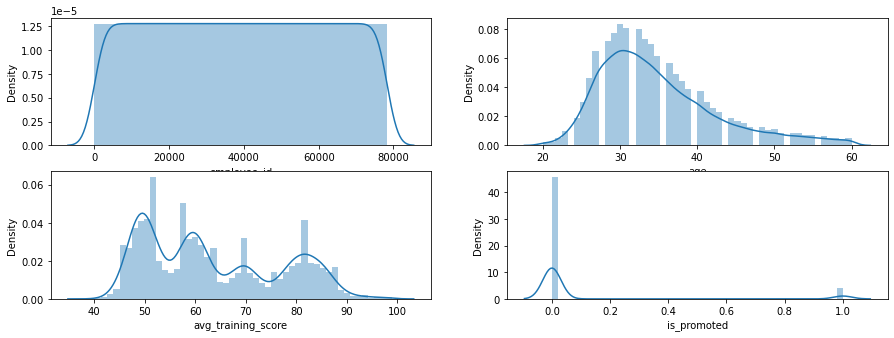

In [20]:
#check the data is normally distributed or not
plt.rcParams['figure.figsize']=[15,8]
c=1
for i in hr.select_dtypes(include=np.number):
    plt.subplot(3,2,c)
    sns.distplot(hr.loc[:,i].dropna())
    c=c+1
plt.show()

In [21]:
#check skewness-Here we can see data is skewed
hr.skew()

employee_id             2.765143e-19
no_of_trainings         3.403109e+00
age                     1.008714e+00
previous_year_rating   -3.148381e-01
length_of_service       1.728033e+00
KPIs_met >80%           6.104767e-01
awards_won?             6.356378e+00
avg_training_score      4.537268e-01
is_promoted             2.972339e+00
dtype: float64

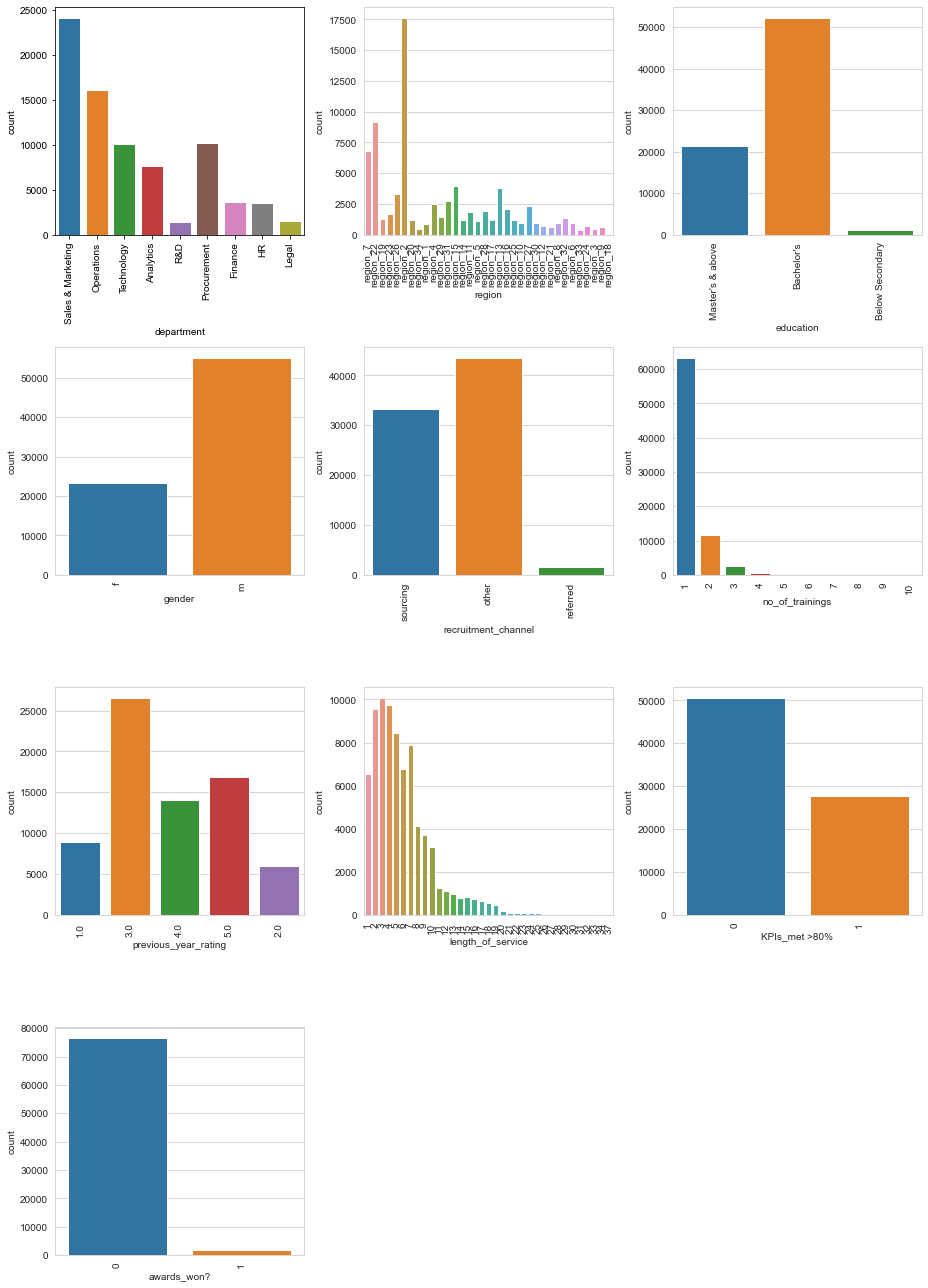

In [22]:
#check value counts by count plot

plt.rcParams["figure.autolayout"] = True
plt.rcParams['figure.figsize']=[13,18]
c=1
for i in hr.select_dtypes(include=object):
    plt.subplot(4,3,c)
    sns.set_style('whitegrid')
    sns.countplot(hr[i])
    c=c+1
    plt.xticks(rotation=90)
plt.show()

In [23]:
#check value_counts of categorical columns
for i in hr.select_dtypes(include=object):
    print(hr[i].value_counts())

Sales & Marketing    24155
Operations           16112
Procurement          10158
Technology           10149
Analytics             7671
Finance               3627
HR                    3503
Legal                 1484
R&D                   1439
Name: department, dtype: int64
region_2     17642
region_22     9167
region_7      6825
region_15     3938
region_13     3815
region_26     3271
region_31     2779
region_4      2478
region_27     2369
region_16     2055
region_28     1913
region_11     1886
region_23     1691
region_29     1408
region_32     1378
region_19     1284
region_14     1177
region_20     1176
region_17     1157
region_25     1156
region_5      1108
region_6       988
region_30      930
region_8       924
region_10      917
region_1       848
region_24      727
region_12      715
region_9       600
region_21      590
region_3       493
region_34      447
region_33      395
region_18       51
Name: region, dtype: int64
Bachelor's          52247
Master's & above    21429
B

# Bivariate Analysis

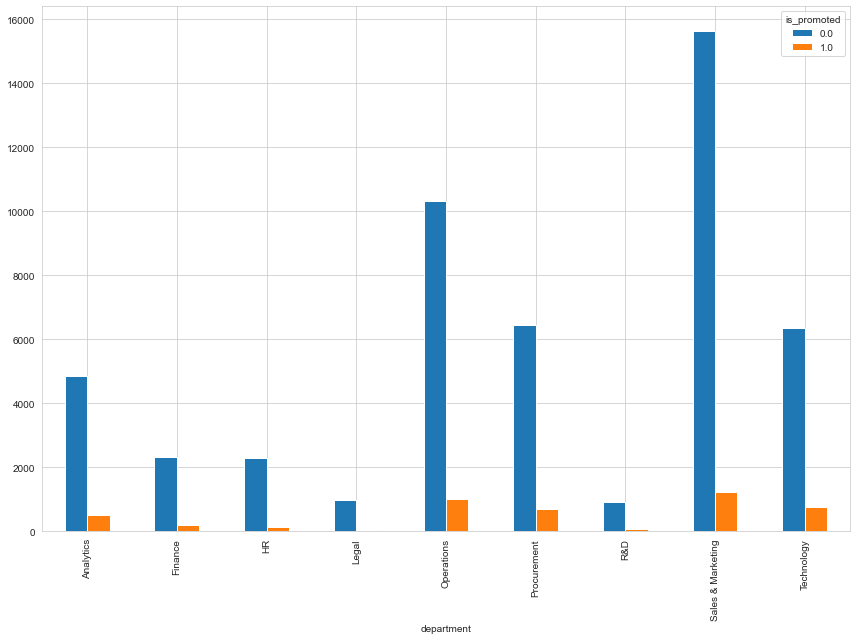

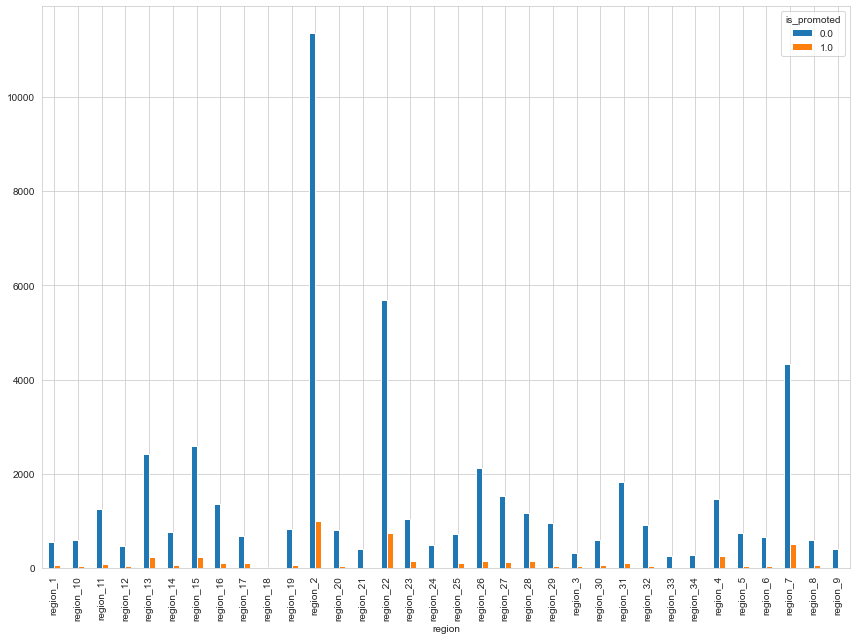

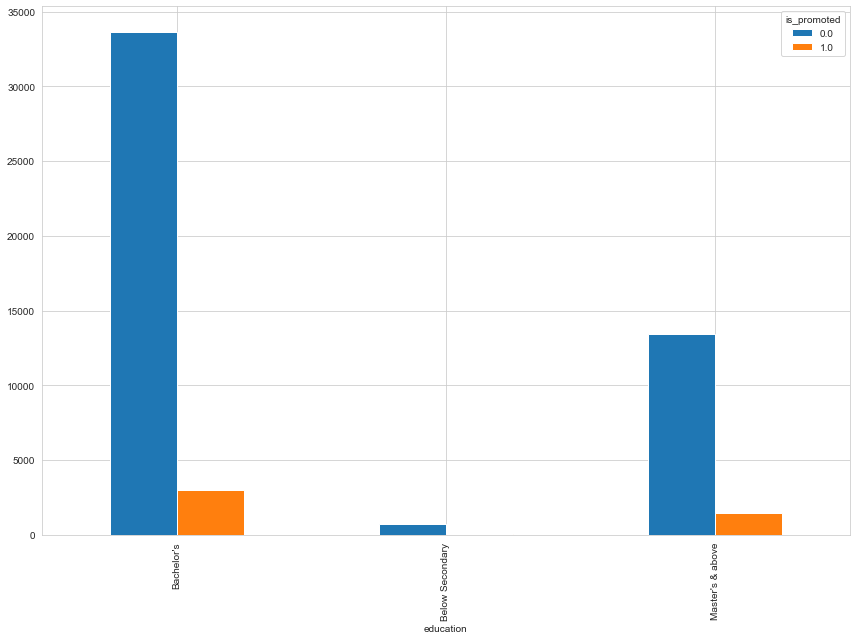

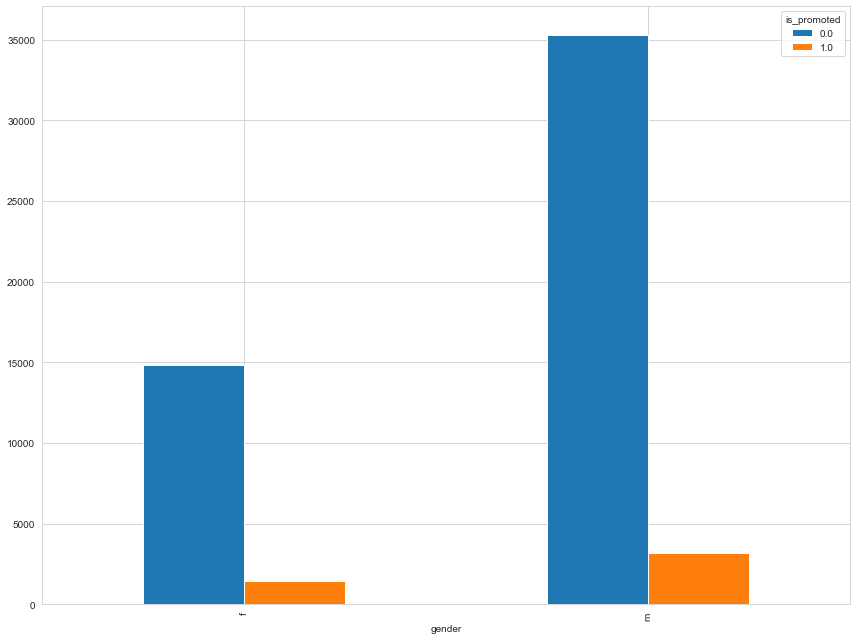

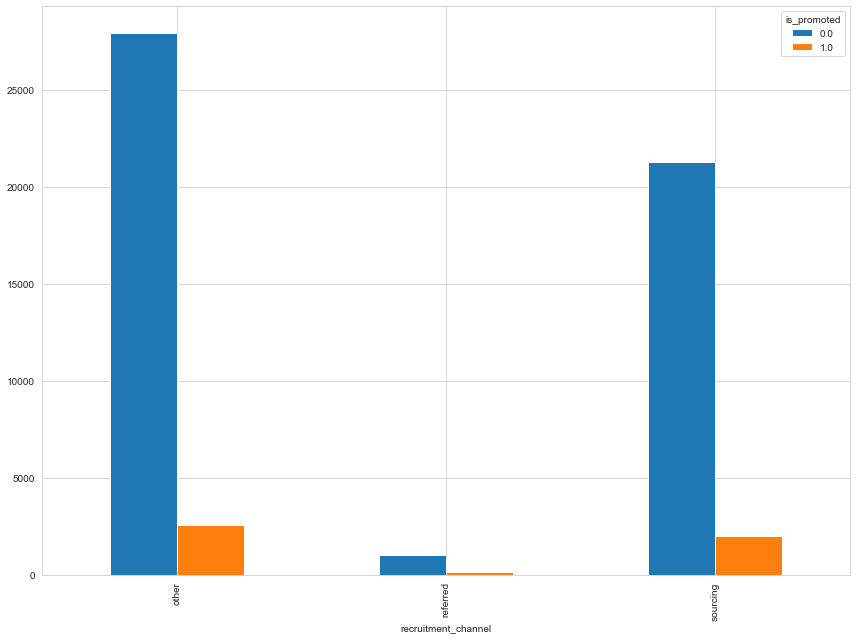

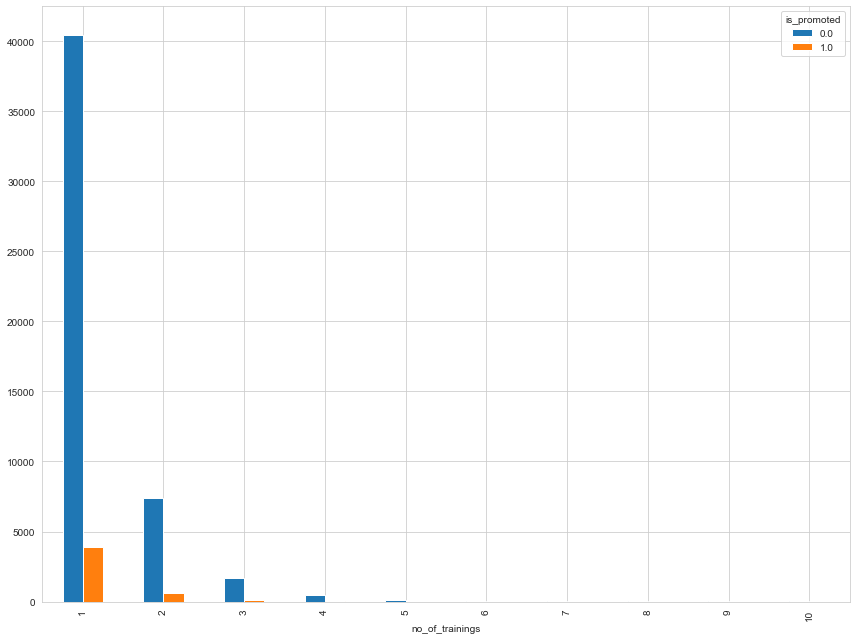

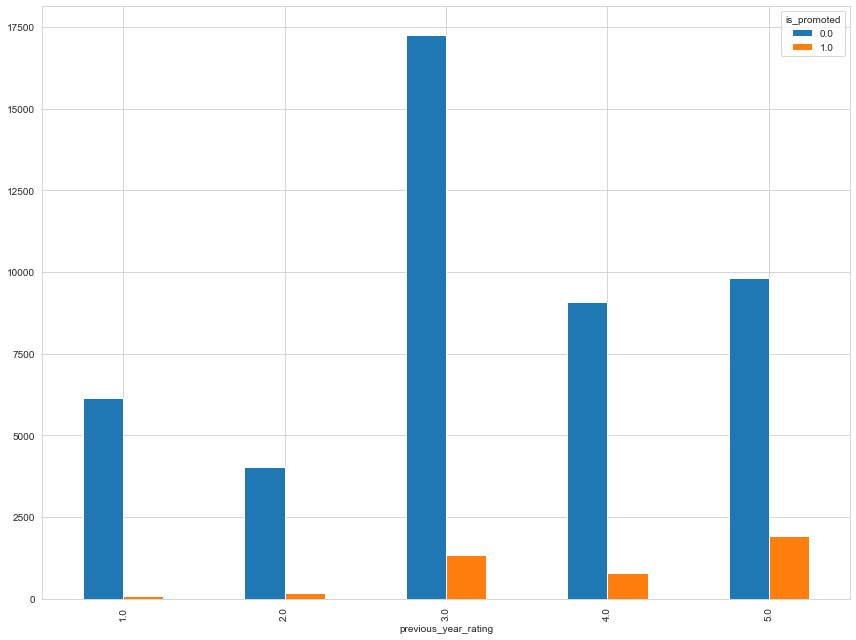

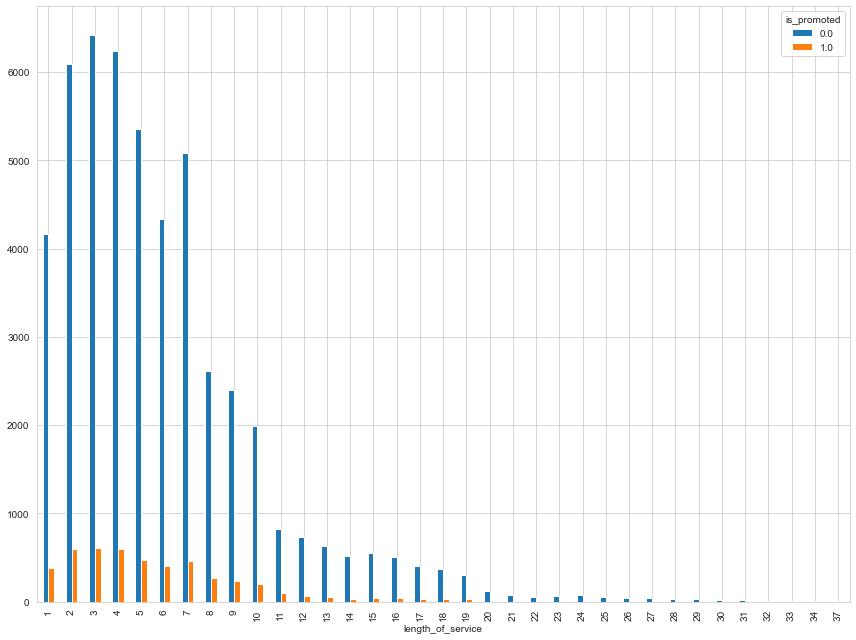

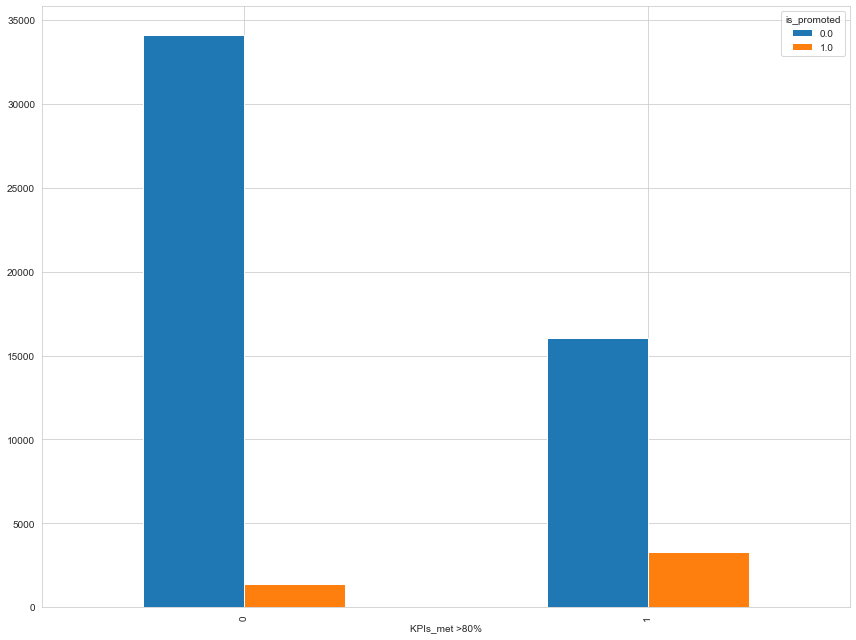

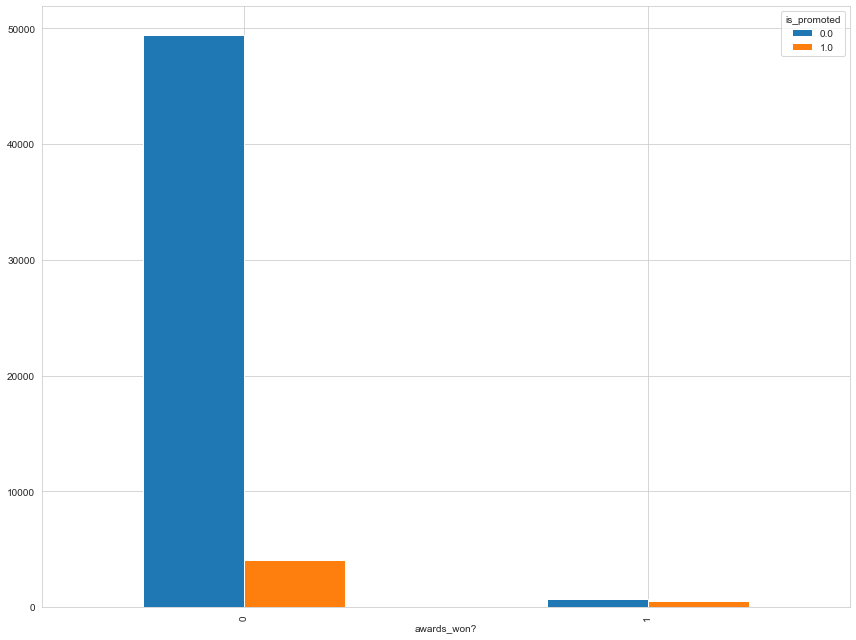

In [24]:
#cat vs cat- using crosstab
plt.rcParams["figure.figsize"]=[12,9]
for i in hr.select_dtypes(include=object):
    sns.set_style('whitegrid')
    (pd.crosstab(hr[i],hr["is_promoted"])).plot(kind='bar')
plt.show()

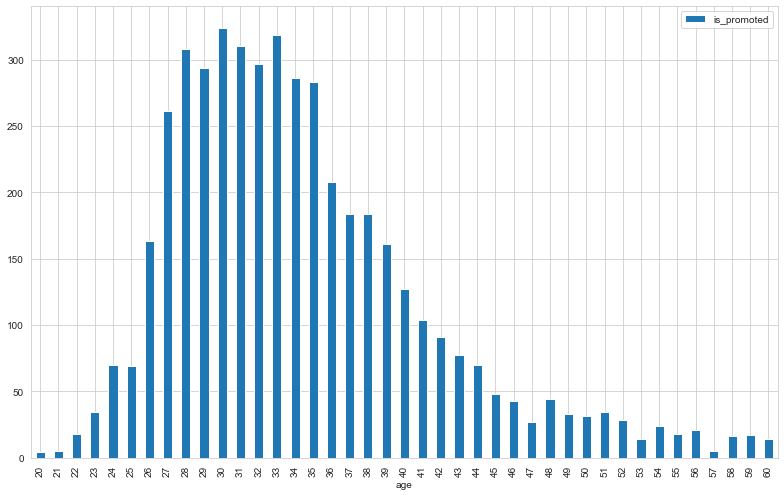

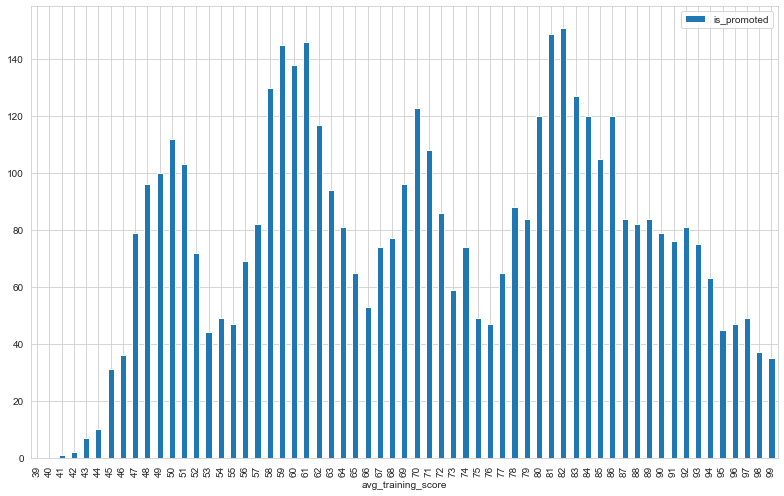

In [25]:
# num vs cat- using groupby
plt.rcParams['figure.figsize']=[11,7]
for i in ["age","avg_training_score"]:
    sns.set_style('whitegrid')
    hr.groupby(i)[["is_promoted"]].sum().plot(kind="bar")

In [26]:
#check correlation
hr.corr().T

,employee_id,age,avg_training_score,is_promoted
employee_id,1.000000,0.000586,-0.003930,0.001206
age,0.000586,1.000000,-0.044592,-0.017166
avg_training_score,-0.003930,-0.044592,1.000000,0.181147
is_promoted,0.001206,-0.017166,0.181147,1.000000


<AxesSubplot:>

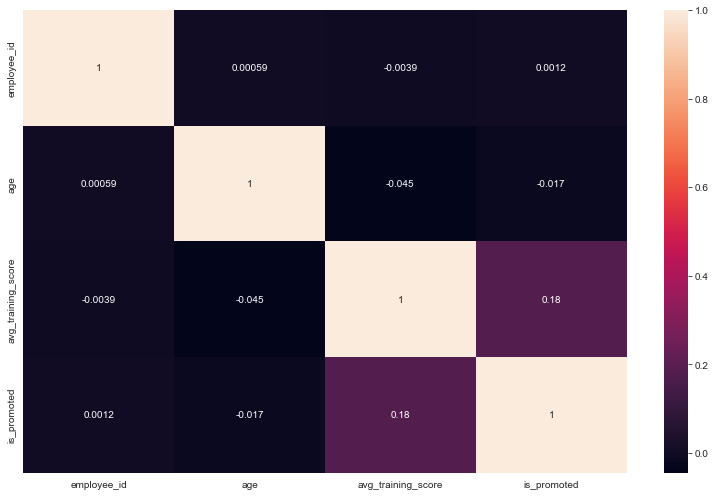

In [27]:
#check correlation
sns.set_style('whitegrid')
sns.heatmap(hr.corr(),annot=True)

# Outliers Treatment by IQR / Boxplot

In [28]:
#check outliers
num_var=["age","avg_training_score"]
for i in num_var:
    q1=hr[i].quantile(0.25)
    q3=hr[i].quantile(0.75)
    iqr=q3-q1
    ul=(q3+1.5*iqr)
    ll=(q1-1.5*iqr)
    print(len(hr.loc[(hr[i]<ll)|(hr[i]>ul),i]),i)

2062 age
0 avg_training_score


In [29]:
#replace outliers with lower limit and upper limit
num_var=["age","avg_training_score"]
for i in num_var:
    q1=hr[i].quantile(0.25)
    q3=hr[i].quantile(0.75)
    iqr=q3-q1
    ul=(q3+1.5*iqr)
    ll=(q1-1.5*iqr)
    hr.loc[(hr[i]<ll),i]=ll
    hr.loc[(hr[i]>ul),i]=ul

In [30]:
# again check outliers
num_var=["age","avg_training_score"]
for i in num_var:
    q1=hr[i].quantile(0.25)
    q3=hr[i].quantile(0.75)
    iqr=q3-q1
    ul=(q3+1.5*iqr)
    ll=(q1-1.5*iqr)
    print(len(hr.loc[(hr[i]<ll)|(hr[i]>ul),i]),i)

0 age
0 avg_training_score


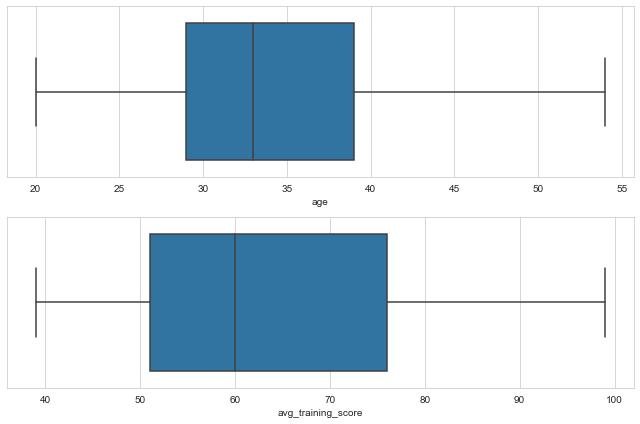

In [31]:
#outliers check by boxplot
plt.rcParams["figure.figsize"]=[9,6]
num_var=["age","avg_training_score"]
c=1
for i in num_var:
    plt.subplot(2,1,c)
    sns.set_style('whitegrid')
    sns.boxplot(hr[i])
    c=c+1
plt.show()

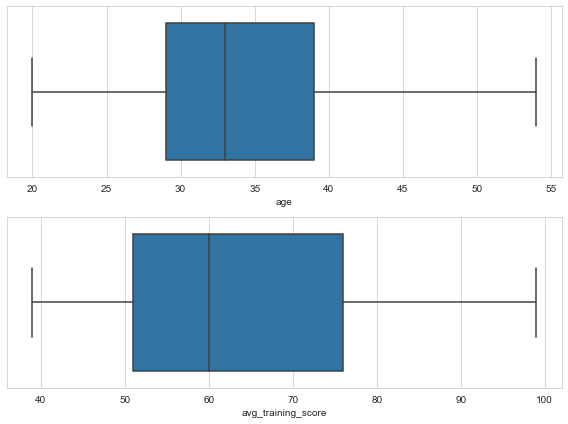

In [32]:
# again check outliers by boxplot
plt.rcParams["figure.figsize"]=[8,6]
num_var=["age","avg_training_score"]
c=1
for i in num_var:
    plt.subplot(2,1,c)
    sns.set_style('whitegrid')
    sns.boxplot(hr[i])
    c=c+1
plt.show()

In [33]:
hr["no_of_trainings"].value_counts()

1     63306
2     11531
3      2531
4       658
5       164
6        68
7        21
8         7
9         7
10        5
Name: no_of_trainings, dtype: int64

In [34]:
pd.crosstab(hr["department"],hr["is_promoted"])

is_promoted,0.0,1.0
department,,
Analytics,4840,512
Finance,2330,206
HR,2282,136
Legal,986,53
Operations,10325,1023
Procurement,6450,688
R&D,930,69
Sales & Marketing,15627,1213
Technology,6370,768


In [35]:
#logic of % people promoted
#no_of_people_in_Analytics=len(hr.loc[hr["department"]=="Analytics"])  #7671
#no_of_people_promoted_in_analytics=(len(hr.loc[(hr["department"]=="Analytics") & (hr["is_promoted"]==1.0)])) #512
#no_of_people_promoted_in_analytics/no_of_people_in_Analytics

In [36]:
# % of promoted people in each department
for i in hr["department"].unique():
    print("% of people promoted in department",i,"->",((len(hr.loc[(hr["department"]==i) & (hr["is_promoted"]==1.0)]))/len(hr.loc[hr["department"]==i]))*100)

% of people promoted in department Sales & Marketing -> 5.021734630511281
% of people promoted in department Operations -> 6.34930486593843
% of people promoted in department Technology -> 7.567248004729531
% of people promoted in department Analytics -> 6.674488332681527
% of people promoted in department R&D -> 4.794996525364837
% of people promoted in department Procurement -> 6.7729868084268565
% of people promoted in department Finance -> 5.6796250344637444
% of people promoted in department HR -> 3.8823865258349985
% of people promoted in department Legal -> 3.571428571428571


In [37]:
#Technology -> 7.567248004729531
#Procurement -> 6.7729868084268565
#Analytics -> 6.674488332681527
#people are promoted highest from these department

In [38]:
# % of people are promoted in each region
for i in hr["region"].unique():
    print("% of people promoted in ",i,"->",((len(hr.loc[(hr["region"]==i) & (hr["is_promoted"]==1.0)]))/len(hr.loc[hr["region"]==i]))*100)

% of people promoted in  region_7 -> 7.560439560439561
% of people promoted in  region_22 -> 8.006981564306752
% of people promoted in  region_19 -> 4.127725856697819
% of people promoted in  region_23 -> 8.101714961561205
% of people promoted in  region_26 -> 4.37175175787221
% of people promoted in  region_2 -> 5.605940369572611
% of people promoted in  region_20 -> 4.166666666666666
% of people promoted in  region_34 -> 1.7897091722595078
% of people promoted in  region_1 -> 6.839622641509433
% of people promoted in  region_4 -> 9.927360774818402
% of people promoted in  region_29 -> 3.053977272727273
% of people promoted in  region_31 -> 3.9582583663188196
% of people promoted in  region_15 -> 5.6373793803961405
% of people promoted in  region_14 -> 5.267629566694987
% of people promoted in  region_11 -> 3.923647932131495
% of people promoted in  region_5 -> 3.15884476534296
% of people promoted in  region_28 -> 8.050182958703607
% of people promoted in  region_17 -> 9.420916162489

In [39]:
#region_4 -> 9.927360774818402
#region_17 -> 9.420916162489196
#region_25 -> 8.910034602076125
#people are promoted highest from these region

In [40]:
for i in hr["education"].unique():
    print("% of people promoted in ",i,"->",((len(hr.loc[(hr["education"]==i) & (hr["is_promoted"]==1.0)]))/len(hr.loc[hr["education"]==i]))*100)

% of people promoted in  Master's & above -> 6.864529376079146
% of people promoted in  Bachelor's -> 5.757268359905831


ZeroDivisionError: division by zero

In [99]:
# % of promoted people in gender
for i in hr["gender"].unique():
    print("% of people promoted in gender",i,"->",((len(hr.loc[(hr["gender"]==i) & (hr["is_promoted"]==1.0)]))/len(hr.loc[hr["gender"]==i]))*100)

% of people promoted in gender f -> 6.32164095492545
% of people promoted in gender m -> 5.810280984534959


In [ ]:
#female are more promoted compare to male
#% of people promoted in gender f -> 6.32164095492545
#% of people promoted in gender m -> 5.810280984534959

In [100]:
# % of promoted people in recruitment_channel
for i in hr["recruitment_channel"].unique():
    print("% of people promoted in recruitment_channel",i,"->",((len(hr.loc[(hr["recruitment_channel"]==i) & (hr["is_promoted"]==1.0)]))/len(hr.loc[hr["recruitment_channel"]==i]))*100)

% of people promoted in recruitment_channel sourcing -> 5.949187788192037
% of people promoted in recruitment_channel other -> 5.87262200165426
% of people promoted in recruitment_channel referred -> 8.662900188323917


In [ ]:
#referred people are highest promoted

In [101]:
# % of promoted people in no_of_trainings
for i in hr["no_of_trainings"].unique():
    print("% of people promoted in no_of_trainings",i,"->",((len(hr.loc[(hr["no_of_trainings"]==i) & (hr["is_promoted"]==1.0)]))/len(hr.loc[hr["no_of_trainings"]==i]))*100)

% of people promoted in no_of_trainings 1 -> 6.176349793068588
% of people promoted in no_of_trainings 2 -> 5.246726216286532
% of people promoted in no_of_trainings 3 -> 4.820229158435401
% of people promoted in no_of_trainings 4 -> 3.951367781155015
% of people promoted in no_of_trainings 7 -> 0.0
% of people promoted in no_of_trainings 5 -> 1.8292682926829267
% of people promoted in no_of_trainings 6 -> 2.941176470588235
% of people promoted in no_of_trainings 8 -> 0.0
% of people promoted in no_of_trainings 10 -> 0.0
% of people promoted in no_of_trainings 9 -> 0.0


In [ ]:
# people completed training 1,2,3- they are most promoted
#people whose training more than 7 they are not promoted

In [102]:
# % of promoted people in age
for i in hr["age"].unique():
    print("% of people promoted in age",i,"->",((len(hr.loc[(hr["age"]==i) & (hr["is_promoted"]==1.0)]))/len(hr.loc[hr["age"]==i]))*100)

% of people promoted in age 35 -> 7.2938144329896915
% of people promoted in age 30 -> 6.159695817490494
% of people promoted in age 34 -> 6.504434841937686
% of people promoted in age 39 -> 6.582174979558462
% of people promoted in age 45 -> 4.51552210724365
% of people promoted in age 31 -> 6.126482213438735
% of people promoted in age 33 -> 6.939308244507288
% of people promoted in age 28 -> 6.830782878687071
% of people promoted in age 32 -> 5.922233300099701
% of people promoted in age 49 -> 5.076923076923077
% of people promoted in age 37 -> 6.005221932114883
% of people promoted in age 38 -> 6.6068222621184916
% of people promoted in age 41 -> 5.549626467449306
% of people promoted in age 27 -> 6.426988426495937
% of people promoted in age 29 -> 6.048138243159844
% of people promoted in age 26 -> 5.587932807679122
% of people promoted in age 24 -> 5.927180355630822
% of people promoted in age 54 -> 4.574383452665075
% of people promoted in age 40 -> 5.431993156544055
% of people

In [ ]:
# people whose age is 35 they are highly promoted
# people whose age is 57 they are lowest promoted

In [103]:
# % of promoted people in previous_year_rating
for i in hr["previous_year_rating"].unique():
    print("% of people promoted in previous_year_rating",i,"->",((len(hr.loc[(hr["previous_year_rating"]==i) & (hr["is_promoted"]==1.0)]))/len(hr.loc[hr["previous_year_rating"]==i]))*100)

% of people promoted in previous_year_rating 5.0 -> 11.408718375103932
% of people promoted in previous_year_rating 3.0 -> 5.105693507667961
% of people promoted in previous_year_rating 1.0 -> 0.9884308660002247
% of people promoted in previous_year_rating 4.0 -> 5.550049554013875


ZeroDivisionError: division by zero

In [ ]:
# previous_year_rating 5.0 -> 11.408718375103932
#5 star people highly promoted

In [104]:
# % of promoted people in length_of_service
for i in hr["length_of_service"].unique():
    print("% of people promoted in length_of_service",i,"->",((len(hr.loc[(hr["length_of_service"]==i) & (hr["is_promoted"]==1.0)]))/len(hr.loc[hr["length_of_service"]==i]))*100)

% of people promoted in length_of_service 8 -> 6.488181379643029
% of people promoted in length_of_service 4 -> 6.1352210936698475
% of people promoted in length_of_service 7 -> 5.877137428752375
% of people promoted in length_of_service 10 -> 6.509253350350989
% of people promoted in length_of_service 2 -> 6.227758007117438
% of people promoted in length_of_service 5 -> 5.638651471984805
% of people promoted in length_of_service 6 -> 5.9214412285883045
% of people promoted in length_of_service 1 -> 5.7654075546719685
% of people promoted in length_of_service 3 -> 6.050069541029207
% of people promoted in length_of_service 16 -> 5.394736842105264
% of people promoted in length_of_service 9 -> 6.190862395241957
% of people promoted in length_of_service 11 -> 7.570977917981073
% of people promoted in length_of_service 26 -> 0.0
% of people promoted in length_of_service 12 -> 5.614973262032086
% of people promoted in length_of_service 17 -> 4.088050314465408
% of people promoted in length

In [ ]:
#people are promoted higly whose length of service 32,34
#24,31,33,37 are not promoted

In [105]:
# % of promoted people in KPIs_met >80%
for i in hr["KPIs_met >80%"].unique():
    print("% of people promoted in KPIs_met >80%",i,"->",((len(hr.loc[(hr["KPIs_met >80%"]==i) & (hr["is_promoted"]==1.0)]))/len(hr.loc[hr["KPIs_met >80%"]==i]))*100)

% of people promoted in KPIs_met >80% 1 -> 11.767676767676766
% of people promoted in KPIs_met >80% 0 -> 2.779864763335838


In [ ]:
# % of people highest promoted in KPIs_met >80% 1 -> 11.767676767676766

In [106]:
# % of promoted people in awards_won?
for i in hr["awards_won?"].unique():
    print("% of people promoted in awards_won?",i,"->",((len(hr.loc[(hr["awards_won?"]==i) & (hr["is_promoted"]==1.0)]))/len(hr.loc[hr["awards_won?"]==i]))*100)

% of people promoted in awards_won? 0 -> 5.371733361222596
% of people promoted in awards_won? 1 -> 30.969529085872576


In [ ]:
#% of people highest promoted in awards_won? 1 -> 30.969529085872576

# Missing Values Treatment

In [ ]:
hr.isnull().sum()

In [ ]:
hr.education.mode()

In [ ]:
hr.previous_year_rating.median()

In [ ]:
plt.rcParams["figure.figsize"]=[12,8]
sns.heatmap(hr.isnull())

In [ ]:
hr.groupby(["gender","department","education"]).size()
#from here we can see Bachelor's is fine to fill null values in education

In [ ]:
#so we can replace null values by Bachelor's in education variable
hr["education"].fillna("Bachelor's",inplace=True)

In [ ]:
hr.isnull().sum()

In [ ]:
hr[["previous_year_rating"]].value_counts()

In [ ]:
#so we can replace null values by 3.0 in previous_year_rating variable
hr["previous_year_rating"].fillna(3.0,inplace=True)

# Feature Engineering

## Binning

#### Binning regions into three category according to the insieght we get in eda

In [ ]:
#create a DataFrame with 2 features "region", "% of promotion"
region=(pd.DataFrame({"region":np.arange(1,35),"% of promotion":np.arange(1,35)}))
region.head()

In [ ]:
x=0
for i in hr["region"].unique():
    region.iloc[x,0]=i
    region.iloc[x,1]=((len(hr.loc[(hr["region"]==i) & (hr["is_promoted"]==1.0)]))/len(hr.loc[hr["region"]==i]))*100
    x=x+1

In [ ]:
region.sort_values(by="% of promotion",ascending=False,inplace=True)

In [ ]:
region

In [ ]:
region.values[:,0]

In [ ]:
#here we gives weightage region wise % promotion

In [ ]:
def reg(i):
    if i in ["region_4","region_17","region_25","region_23",
            "region_28","region_22","region_22","region_7","region_3"]:
        return 4
    elif i in ['region_1','region_30','region_13','region_8','region_15',
               'region_2','region_10','region_27','region_14']:
        return 3
    elif i in ['region_16','region_12','region_26','region_20','region_19',
               'region_31','region_11','region_6','region_5','region_29','region_21'] :
        return 2
    elif i in ['region_32', 'region_33','region_24','region_18','region_34','region_9']:
        return 1
    else:
        return 0
    
hr["region"]=hr.region.apply(reg)

In [ ]:
hr[["region"]].head()

In [ ]:
#now we gives weightage (no_of_trainings) with respact to (% promotion)

In [ ]:
hr[["no_of_trainings"]].value_counts()

In [ ]:
def training(i):
    if i in [1,2,3]:
        return 2
    elif i in [4,6,5]:
        return 1
    else:
        return 0
    
hr["no_of_trainings"]=hr.no_of_trainings.apply(training)

In [ ]:
hr["no_of_trainings"].value_counts()

In [ ]:
(hr["length_of_service"].value_counts())

### mapping "length of service" for better result

In [ ]:
d=dict()
i=1
j=37
for k in range(37):
    d[i]=j
    i+=1
    j-=1

In [ ]:
hr["length_of_service"]=hr["length_of_service"].map(d)

### mapping "gender" for better result

In [ ]:
hr["gender"] = hr["gender"].map({"m":0,"f":1})

### mapping "education" for better result

In [ ]:
hr["education"] = hr["education"].map({"Master's & above":3,"Bachelor's":2,'Below Secondary':1})

# Data Preprocessing

#### Droping unwanted feature

In [ ]:
#drop emp id
hr.drop("employee_id",axis=1,inplace=True)

In [61]:
hr.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

In [81]:
hr.loc[hr["is_promoted"]==1]["gender"].value_counts()

m    3201
f    1467
Name: gender, dtype: int64

In [89]:
test["prom"]=pd.Series(p3)

In [93]:
#train.loc[(train["education"]=="Below Secondary")&(train["no_of_trainings"]==4)]
test.loc[(test["education"]=="Below Secondary")&(test["no_of_trainings"]==4),"prom"]

In [110]:
hr["awards_won?"].value_counts()
hr.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

In [112]:
hr.loc[hr["is_promoted"]==1].head(15)


,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
11,49017,Sales & Marketing,region_7,Bachelor's,f,sourcing,1,35,5.0,3,1,0,50.0,1.0
39,58304,Sales & Marketing,region_28,Bachelor's,m,sourcing,1,33,5.0,6,1,0,51.0,1.0
60,17673,Sales & Marketing,region_4,Master's & above,m,other,1,50,4.0,17,1,0,47.0,1.0
66,77981,Finance,region_22,Bachelor's,m,other,1,27,NaN,1,1,1,58.0,1.0
67,16502,Sales & Marketing,region_22,Bachelor's,m,sourcing,1,27,NaN,1,0,0,61.0,1.0
69,45624,Analytics,region_31,Bachelor's,m,other,1,30,3.0,7,1,0,84.0,1.0
71,24040,Technology,region_22,Master's & above,m,other,1,34,5.0,7,1,0,78.0,1.0
75,54782,Sales & Marketing,region_2,Master's & above,m,sourcing,1,38,4.0,2,1,0,49.0,1.0
79,59147,Sales & Marketing,region_22,Bachelor's,m,sourcing,1,30,3.0,3,0,0,58.0,1.0
84,44575,Legal,region_7,Bachelor's,m,other,1,29,NaN,1,0,0,65.0,1.0


In [87]:
#train["income"].value_counts()
import numpy as np
c1=np.zeros(42000)
from numpy.random import randint
p3=randint(1,2,23490)
p3

array([1, 1, 1, ..., 1, 1, 1])

In [88]:
for i in p3:
    print(i)

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


In [86]:
p3=np.random.choice([0, 1], size=23490, p=[.10, .90])
p3

array([1, 1, 0, ..., 1, 1, 1])

In [95]:
p3=test["prom"]

In [96]:


submission=pd.DataFrame({'employee_id':test.employee_id,
                        'is_promoted':p3})

submission.to_csv("hr1.csv",index=False)

In [97]:
from sklearn.metrics import f1_score

In [113]:
hr.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

In [153]:
X=hr[["KPIs_met >80%"]].iloc[:54808,:]
y=hr[["is_promoted"]].iloc[:54808,:]

In [167]:
pd.concat([X,y],axis=1).corr()

,KPIs_met >80%,is_promoted
KPIs_met >80%,1.000000,0.221582
is_promoted,0.221582,1.000000


In [159]:
X=X.astype(int)

In [151]:
test[["KPIs_met >80%"]]

,KPIs_met >80%
0,1
1,0
2,0
3,0
4,0
...,...
23485,0
23486,0
23487,0
23488,0


In [134]:
hr[["KPIs_met >80%","is_promoted"]].iloc[:54808,:]
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.25)
log=LogisticRegression()
model=log.fit(xtrain,ytrain)
pred=model.predict(xtest)
print(f1_score(ytest,pred))

0.0


In [143]:
test.drop("prom",axis=1,inplace=True)

In [154]:
from xgboost import XGBClassifier
xgb = XGBClassifier()

In [160]:
from sklearn.metrics import f1_score
#xtrain,xtest,ytrain,ytest=train_test_split(hr_train_cleaned.drop("is_promoted",axis=1),hr_train_cleaned["is_promoted"],test_size=0.25)
xgb=XGBClassifier()
model=xgb.fit(X,y)
pred=model.predict(test[["KPIs_met >80%"]])
#print(f1_score(ytest,pred))

In [162]:
for i in pred:
    print(i)

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


In [ ]:
hr.head()

In [ ]:
#hr.loc[(hr["education"].isnull())&(hr["department"]=="Sales & Marketing")&
#   ((hr["region"]=="region_2")|(hr["region"]=="region_7")|(hr["region"]=="region_22"))
#&(hr["gender"]=="m")&(~(hr["recruitment_channel"]=="referred")),"education"]="Bachelor's"

In [ ]:
hr.education.isnull().sum()

In [ ]:
hr.columns

In [ ]:
cat=["department","region","education","gender",'recruitment_channel','no_of_trainings','previous_year_rating','KPIs_met >80%','awards_won?','is_promoted']
num=['age','length_of_service','avg_training_score']
columns=['department', 'region', 'education', 'gender', 'recruitment_channel',
       'no_of_trainings', 'age','length_of_service',
       'KPIs_met >80%', 'awards_won?', 'avg_training_score']

In [ ]:
hr.head()

In [ ]:
#from sklearn.preprocessing import StandardScaler
#scaler=StandardScaler()
#hr["age"]=scaler.fit_transform(hr[["age"]])
#hr["length_of_service"]=scaler.fit_transform(hr[["length_of_service"]])
#hr["avg_training_score"]=scaler.fit_transform(hr[["avg_training_score"]])

In [ ]:
hr[["age","length_of_service","avg_training_score"]]

In [ ]:
hr.head()

In [ ]:
#print("Female:-",(hr.loc[(hr["gender"]=="f")&(hr["is_promoted"]==1)].shape[0])/hr.loc[hr["gender"]=="f"].shape[0])
#print("MAle:-",(hr.loc[(hr["gender"]=="m")&(hr["is_promoted"]==1)].shape[0])/hr.loc[hr["gender"]=="m"].shape[0])

In [ ]:
#print("Bachelor's:-",(hr.loc[(hr["education"]=="Bachelor's")&(hr["is_promoted"]==1)].shape[0])/hr.loc[hr["education"]=="Bachelor's"].shape[0])
#print("Master's & above:-",(hr.loc[(hr["education"]=="Master's & above")&(hr["is_promoted"]==1)].shape[0])/hr.loc[hr["education"]=="Master's & above"].shape[0])
#print("Below Secondary:-",(hr.loc[(hr["education"]=="Below Secondary")&(hr["is_promoted"]==1)].shape[0])/hr.loc[hr["education"]=="Below Secondary"].shape[0])

In [ ]:
#print("other:-",(hr.loc[(hr["recruitment_channel"]=="other")&(hr["is_promoted"]==1)].shape[0])/hr.loc[hr["recruitment_channel"]=="other"].shape[0])
#print("sourcing:-",(hr.loc[(hr["recruitment_channel"]=="sourcing")&(hr["is_promoted"]==1)].shape[0])/hr.loc[hr["recruitment_channel"]=="sourcing"].shape[0])
#print("referred:-",(hr.loc[(hr["recruitment_channel"]=="referred")&(hr["is_promoted"]==1)].shape[0])/hr.loc[hr["recruitment_channel"]=="referred"].shape[0])

In [ ]:
#from lightgbm import LGBMClassifier
#lgb = LGBMClassifier()

In [ ]:
#from xgboost import XGBClassifier
#xgb = XGBClassifier()

In [ ]:
#pip install lightgbm